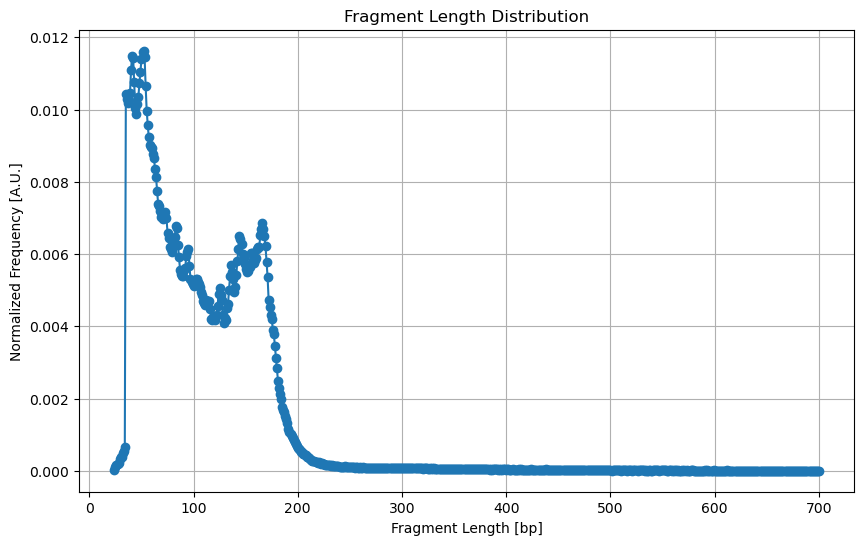

In [9]:
import gzip  # For reading compressed files
import matplotlib.pyplot as plt  # For plotting
from collections import Counter  # For counting fragment lengths

# Step 1: Initialize a Counter to store fragment length counts directly
length_counts = Counter()

# Step 2: Open the compressed .gz file and process line by line
with gzip.open("C:/Users/ADARSH VERMA/Downloads/query.bed.gz", "rt") as file:
    for line in file:
        if line.strip() == "":
            continue  # Skip empty lines
        parts = line.strip().split()
        start = int(parts[1])  # 2nd column (start)
        end = int(parts[2])    # 3rd column (end)
        length = end - start
        length_counts[length] += 1  # Directly increment count for this length

# Step 3: Normalize the counts
total_fragments = sum(length_counts.values())
normalized_counts = {length: count / total_fragments for length, count in length_counts.items()}

# Step 4: Prepare sorted data for plotting
sorted_lengths = sorted(normalized_counts.keys())
normalized_frequencies = [normalized_counts[length] for length in sorted_lengths]

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, normalized_frequencies, marker='o', linestyle='-')
plt.xlabel('Fragment Length [bp]')
plt.ylabel('Normalized Frequency [A.U.]')
plt.title('Fragment Length Distribution')
plt.grid(True)
plt.show()
